In [26]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [27]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
test_ids = test_data['PassengerId']

<Axes: xlabel='Age', ylabel='Count'>

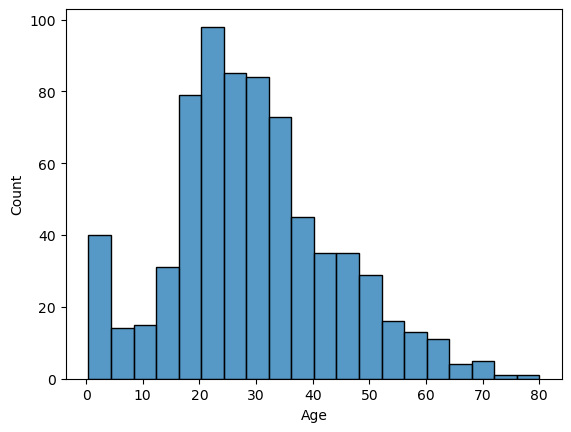

In [30]:
sns.histplot(data=train_data, x='Age')

In [31]:
train_data['Age'].max()

80.0

In [32]:
def get_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    return title

In [33]:
train_data['Title'] = train_data['Name'].apply(get_title)
test_data['Title'] = test_data['Name'].apply(get_title)

In [34]:
columns_to_drop = ['Name','PassengerId']
X_train = train_data.drop(columns = columns_to_drop + ['Survived'])
y_train = train_data['Survived']

X_test = test_data.drop(columns = columns_to_drop)

In [35]:
numeric_features = ['Age', 'SibSp','Parch','Fare']
categorical_features = ['Pclass','Sex','Embarked','Ticket','Cabin','Title']

In [36]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

In [37]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [39]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, 
    max_depth=5,      
    random_state=23))])

In [40]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'Ticket', 'Cabin',
                                                   'Title'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=200,
                                        random_state=23))])

In [41]:
predictions = pipeline.predict(X_test)

In [42]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit on training split and evaluate on validation set
pipeline.fit(X_train_split, y_train_split)
val_predictions = pipeline.predict(X_val)

# Accuracy score
accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.76


In [43]:
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': predictions
})
submission.to_csv('submission5.csv', index=False)

In [44]:
from sklearn.model_selection import cross_val_score

# Add this after your pipeline is defined
cv_scores_before = cross_val_score(pipeline, X_train.drop('Title', axis=1), y_train, cv=5)
cv_scores_after = cross_val_score(pipeline, X_train, y_train, cv=5)

print("Scores without Title:", cv_scores_before.mean())
print("Scores with Title:", cv_scores_after.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Title'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/utils/__init__.py", line 505, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3798, in get_loc
    raise KeyError(key) from err
KeyError: 'Title'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 906, in fit_transform
    self._validate_column_callables(X)
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 496, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/utils/__init__.py", line 513, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe
